Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to get X01 spectrum from SDSS.

# Previously
From 20200821, we learnt that X01 is a star found in SDSS DR12 and 2MASS catalogs through DS9.
- 2MASS J02581083-0857174
- SDSS DR12 J025811.68-085723.3

In 20200824/01, we extracted X01 spectrum from the field of GRB 190829A 201911 G102. However, X01 is contaminated by C02 around < 9500 A, which is the region we need a very clean extraction for removing X01 contamination on GRB 190829A. Therefore, we diverted our effort to finding X01 spectrum from catalogs.

# SDSS
SDSS DR12 released both [optical and IR spectra catalogs](https://www.sdss.org/dr12/spectro/catalogs/). We accessed photometry of X01 through both from DS9 and tools from SDSS website. We noted that:
- SDSS magnitude system is AB. However, there is a systematic offset, and further correction might be needed [link](https://www.sdss.org/dr12/algorithms/fluxcal/#SDSStoAB). This error is about less than 2%.
- u (g) band from DS9 of X01 is fainter (brighter) by about 0.2 (0.2) magnitude compared to website's [link](http://skyserver.sdss.org/dr16/en/tools/quicklook/summary.aspx?ra=2:58:11.68&dec=-8:57:23.3). This might be dued to website using DR16, while DS9 still uses DR12. We will use website values for the correct values as: (band, ABmag, emag)
 - u 24.47 1.17
 - g 21.96 0.09
 - r 20.64 0.04
 - i 20.04 0.04
 - z 19.74 0.11
- We noted that ugriz of X01 from 20200821 are from DS9 SDSS DR12. Therefore, code must change to use DR16 instead.

# Task
Following in this Notebook, we will try to locate plate ID of X01 in SDSS spectrum catalog.


In [33]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
t = './plates-dr12.fits'
t = fits.open(t)
t.info()


Filename: ./plates-dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    279   5392R x 131C   [19A, 4A, 6A, 6A, 3A, J, J, J, J, J, 53A, D, D, 37A, 10A, 11A, 19A, 8A, D, D, D, J, D, D, D, E, J, 13A, 28A, E, E, E, E, E, 15A, 16A, 16A, 6A, 16A, 4A, 27A, 16A, 4A, 121A, 8A, 77A, E, E, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4A, 6A, 7A, J, J, J, J, J, J, J, J, J, E, J, E, 6A, 6A, 7A, J]   


In [35]:
t[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                   16 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /Extensions may be present                       
SAS_VERS= 'trunk 159437'       /version of sas product                          
TREE_VER= 'bosswork'           /version of sas product                          

In [36]:
t[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.8            
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                 1009 /Number of bytes per row                         
NAXIS2  =                 5392 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                  131 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [37]:
data = t[1].data.copy()

In [38]:
dir(data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__p

In [39]:
data.columns

ColDefs(
    name = 'PLATEID'; format = '19A'
    name = 'FIRSTRELEASE'; format = '4A'
    name = 'RUN2D'; format = '6A'
    name = 'RUN1D'; format = '6A'
    name = 'RUNSSPP'; format = '3A'
    name = 'PLATE'; format = 'J'
    name = 'TILE'; format = 'J'
    name = 'DESIGNID'; format = 'J'
    name = 'LOCATIONID'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'MJDLIST'; format = '53A'
    name = 'RACEN'; format = 'D'
    name = 'DECCEN'; format = 'D'
    name = 'IOPVERSION'; format = '37A'
    name = 'CAMVERSION'; format = '10A'
    name = 'TAIHMS'; format = '11A'
    name = 'DATEOBS'; format = '19A'
    name = 'TIMESYS'; format = '8A'
    name = 'CX'; format = 'D'
    name = 'CY'; format = 'D'
    name = 'CZ'; format = 'D'
    name = 'CARTID'; format = 'J'
    name = 'TAI'; format = 'D'
    name = 'TAI_BEG'; format = 'D'
    name = 'TAI_END'; format = 'D'
    name = 'AIRMASS'; format = 'E'
    name = 'MAPMJD'; format = 'J'
    name = 'MAPNAME'; format = '13A'
    name = 'PLU

In [40]:
data['PLATEID']

chararray(['299489402097264640', '299489402567026688',
           '300615302104770560', ..., '8515181109704192000',
           '8516307009510371328', '8517432909501100032'], dtype='<U19')

In [41]:
data['RACEN']

array([145.89281  , 145.89281  , 147.73317  , ..., 244.6000061,
       242.5      , 242.5      ])

In [42]:
data['DECCEN']

array([ 6.13090000e-02,  6.13090000e-02, -3.06530000e-02, ...,
        5.45000000e+01,  5.37999992e+01,  5.52000008e+01])

In [43]:
RADEC = (44.54869,-8.95649)

In [44]:
dx,dy = 1.,1.

In [45]:
plateid,ra,dec = data['PLATEID'],data['RACEN'],data['DECCEN']
ra.shape

(5392,)

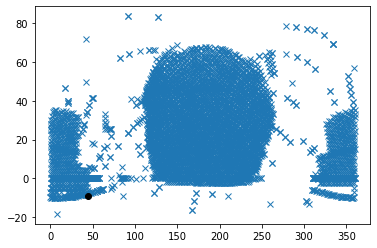

In [46]:
plt.plot(ra,dec,'x',label=plateid)
plt.plot(*RADEC,'ko')

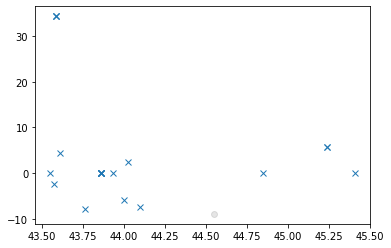

In [47]:
m = np.argwhere((ra >= RADEC[0]-dx)&(ra <= RADEC[0]+dx)).flatten()
#                 &(dec >= RADEC[1]-dy)&(dec <= RADEC[1]+dy)).flatten()
plt.plot(ra[m],dec[m],'x',label=plateid[m])
plt.plot(*RADEC,'ko',alpha=0.1)


# Summary
There is no X01 spectrum in the catalog. This is consistent with [web search from DR16](http://skyserver.sdss.org/dr16/en/tools/quicklook/summary.aspx?ra=2:58:11.68&dec=-8:57:23.3).
